### Load the DataFrame and only care about dataset, algorithm and averaged auroc

In [1]:
import pandas as pd
df = pd.read_pickle("../experiment-multi_dim_multivariate-2018-07-23-013012.pkl")['benchmark_results']
df = df.groupby(["dataset", "algorithm"], as_index=False).mean()
df = df[["dataset", "algorithm", "auroc"]]
df.head()

,dataset,algorithm,auroc
0,Synthetic Multivariate 1000-dimensional extrem...,DAGMM_LSTMAutoEncoder_withWindow,0.721979
1,Synthetic Multivariate 1000-dimensional extrem...,DAGMM_NNAutoEncoder_withWindow,0.709913
2,Synthetic Multivariate 1000-dimensional extrem...,DAGMM_NNAutoEncoder_withoutWindow,0.617652
3,Synthetic Multivariate 1000-dimensional extrem...,LSTM-AD,0.867358
4,Synthetic Multivariate 1000-dimensional extrem...,Recurrent EBM,0.478871


### Only take datasets with a specific string in their names

In [2]:
DATASET_REQUIRED_CONTENT = None

if DATASET_REQUIRED_CONTENT is not None:
    df = df[df['dataset'].str.contains(DATASET_REQUIRED_CONTENT)]

### We want to plot several subfigures that are ordered by the dataset properties (e.g. types of outliers). The x-values of a plot are contained in x_axis (e.g. number of dimensions) and the y-values are always the averaged auroc scores.

In [3]:
import collections

def recursively_default_dict():
    # We can arbitrarily set values in the dict even if the key has not been used, yet
    return collections.defaultdict(recursively_default_dict)

results = recursively_default_dict() # property - algorithm - dimension
algorithm_name = {'DAGMM_LSTMAutoEncoder_withWindow': 'DAGMM-LW', 'DAGMM_NNAutoEncoder_withWindow': 'DAGMM-NW', 'Donut': 'Donut',
                  'DAGMM_NNAutoEncoder_withoutWindow': 'DAGMM-NN', 'LSTM-AD': 'LSTM-AD', 'Recurrent EBM': 'REBM', 'LSTMED': 'LSTMED'}
x_axis = set()
dataset_properties = ['Doubled', 'Shrinked', 'Inversed', 'XOR', 'Delayed', 'Delayed Missing']
algorithms = set()

for _, row in df.iterrows():
    dataset_property = row[0].split('(f=')[1].split(')')[0] # Adapt this to the property you're interested in
    x = int(row[0].split('-dimensional')[0].split(' ')[2])  # Adapt this to the  x-value you're interested in
    x_axis.add(x)
    algorithm = algorithm_name[row[1]]
    algorithms.add(algorithm)
    score = float(row[2])
    results[dataset_property][algorithm][x] = score
algorithms = sorted(list(algorithms))
results['delayed']

defaultdict(<function __main__.recursively_default_dict()>,
            {'DAGMM-LW': defaultdict(<function __main__.recursively_default_dict()>,
                         {1000: 0.4941089840427441,
                          200: 0.8286239971093473,
                          500: 0.7143285684447318}),
             'DAGMM-NW': defaultdict(<function __main__.recursively_default_dict()>,
                         {1000: 0.4717103902329286,
                          200: 0.8064511680740732,
                          500: 0.6732210412839976}),
             'DAGMM-NN': defaultdict(<function __main__.recursively_default_dict()>,
                         {1000: 0.5061694960016714,
                          200: 0.7989211838404136,
                          500: 0.7093837759347876}),
             'LSTM-AD': defaultdict(<function __main__.recursively_default_dict()>,
                         {1000: 0.8325698289407795,
                          200: 0.9558321578104841,
                          500:

In [5]:
x_label = "Dimensions"
x_max = str(max(x_axis) + 100) # Add some value to the maximal ordinate so we have some space to the right
caption = "Comparison of how the algorithms performed on various outliers with different dimensions"
label = "fig:multi_highd"

for property_index, property_ in enumerate(dataset_properties):
    property_lower = property_.lower().replace(' ', '_')
    title = f"({property_index}) {property_}"            # Title of a subfigure e.g. "(0) Doubled"

    # Add figure block
    header = ""
    if property_index == 0:
        header += "\\begin{figure}[!h]\n\\centering"
    header += "" + \
    """\\begin{subfigure}{.475\\linewidth}
    \\centering
    """
    
    header += u"""
    \\begin{tikzpicture}[yscale=0.9]
    \\begin{axis}[
        title={{the_title}},
        xlabel={x_label},
        ylabel={AUROC},
        xmin=0, xmax={x_max},
        ymin=0, ymax=1,
        xtick={x_axis},
        ytick={0,0.2, 0.4, 0.6, 0.8, 1.0},
        legend pos=north west,
        ymajorgrids=true,
        grid style=dashed,
        legend style ={ at={(0,0)}, 
            anchor=south west, draw=black, 
            fill=white,align=left},
        %cycle list name=black white,
        width=\\linewidth
    ]
    """.replace("the_title", title).replace("x_label", x_label).replace("x_axis",",".join([str(x) for x in sorted(list(x_axis))])).replace("x_max", x_max)
    print(header)
    for algorithm in algorithms:
        add_plot = """
        \\addplot
            coordinates {
            """
        for x_value in x_axis:
            add_plot += f"({x_value},{results[property_lower][algorithm][x_value]})" # Add (x,y) to be plotted
        print(add_plot + "};")
    if property_index == 0:                                                          # In the beginning, we define the legend
        print("\\legend{algorithms}".replace("algorithms", ",".join(algorithms)))
    print("""
    \\end{axis}
    \\end{tikzpicture}
    \\end{subfigure}""")
    if property_index % 2 == 0:                                                     # Add some space after two sub-figures
        print("\\hfill")
    else:
        if property_index == len(dataset_properties)-1:                             # In the end, add the caption            
            print("\\caption{" + caption + "}")
            print("\\label{" + label + "}")
            print("\\end{figure}")

\begin{figure}[!h]
\centering\begin{subfigure}{.475\linewidth}
    \centering
    
    \begin{tikzpicture}[yscale=0.9]
    \begin{axis}[
        title={{(0) Doubled}},
        xlabel={Dimensions},
        ylabel={AUROC},
        xmin=0, xmax={1100},
        ymin=0, ymax=1,
        xtick={200,500,1000},
        ytick={0,0.2, 0.4, 0.6, 0.8, 1.0},
        legend pos=north west,
        ymajorgrids=true,
        grid style=dashed,
        legend style ={ at={(0,0)}, 
            anchor=south west, draw=black, 
            fill=white,align=left},
        %cycle list name=black white,
        width=\linewidth
    ]
    

        \addplot
            coordinates {
            (1000,0.48714824652132693)(500,0.8729175464339403)(200,0.8945548894735972)};

        \addplot
            coordinates {
            (1000,0.518216245823699)(500,0.8943649339101674)(200,0.9315798541741227)};

        \addplot
            coordinates {
            (1000,0.4995935745115073)(500,0.7074390000165067)(200,0.91

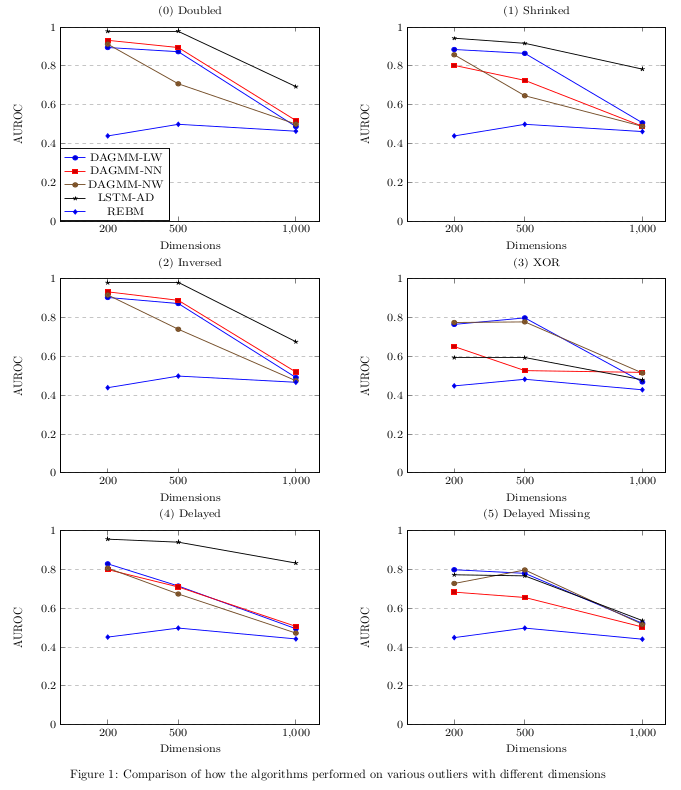